In [227]:
library(ggfortify)  # autoplot
library(dplyr)      # select
library(ggplot2)    # ggplot
library(gridExtra)  # grid
library(olsrr)      # hadi

In [234]:
# Data Load
setwd('D:/Working/03.Korea/회귀분석/Final-Report/google-play-store-apps')
gplay_data <- read.csv(file="googleplaystore.csv", header=TRUE, sep=",")

In [235]:
gplay_data <- subset(gplay_data, Category == "GAME")     # Category 항목을 GAME 데이터만 사용 
gplay_data <- subset(gplay_data, Type == "Paid")         # Type 항목을 Paid 데이터만 사용
gplay_data <- subset(gplay_data, Last_Updated == "2017") # 업데이트 2017 년도의 데이터만 사용
rownames(gplay_data) <- 1:nrow(gplay_data)               # index 초기화.
gplay_data <- gplay_data %>% dplyr::select(-Category, -Type, -Last_Updated)  # 결정 된 항목의 열을 삭제

In [236]:
# 전체 적합
gplay_reg = lm(Rating ~ ., gplay_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7627 -0.1443 -0.0406  0.1899  0.7332 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.512e+00  2.723e-01  16.567 1.36e-10 ***
Reviews      1.194e-04  8.715e-05   1.370   0.1924    
Size        -1.341e-02  6.974e-03  -1.923   0.0751 .  
Installs    -6.110e-06  8.712e-06  -0.701   0.4946    
Price        1.551e-02  3.349e-02   0.463   0.6504    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.415 on 14 degrees of freedom
Multiple R-squared:  0.355,	Adjusted R-squared:  0.1707 
F-statistic: 1.927 on 4 and 14 DF,  p-value: 0.1618


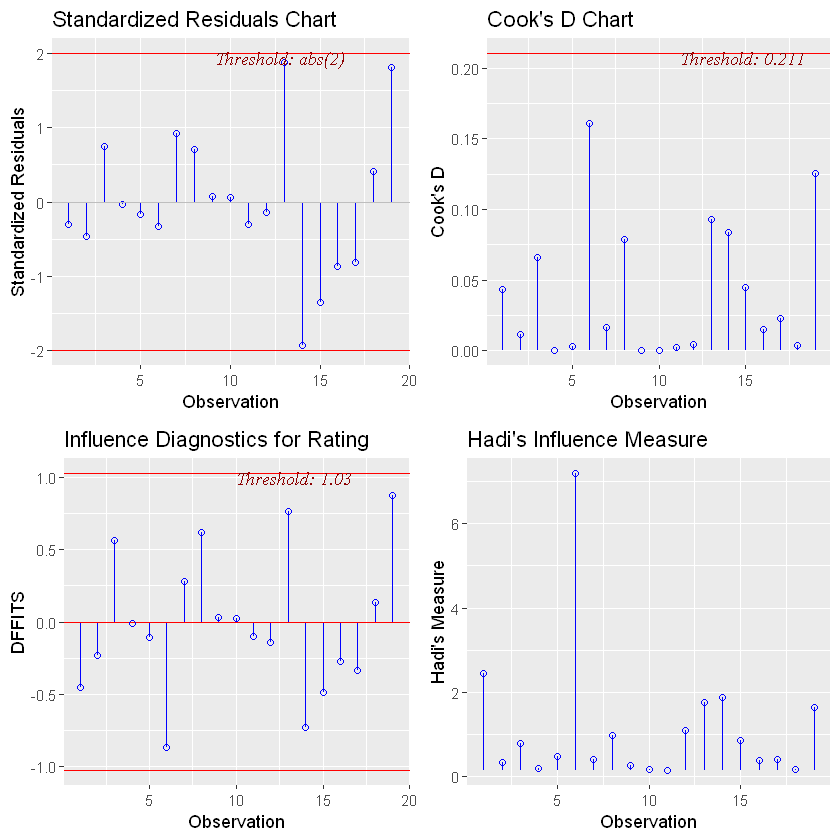

In [238]:
p1 <- ols_plot_resid_stand(gplay_reg)$plot     # Standardized Residuals Chart
p2 <- ols_plot_cooksd_chart(gplay_reg)$plot    # Cook's D Chart
p3 <- ols_plot_dffits(gplay_reg)$plot          # DFFITS
p4 <- ols_plot_hadi(gplay_reg)                 # H

grid.arrange(p1, p2, p3, p4, ncol=2, nrow=2)

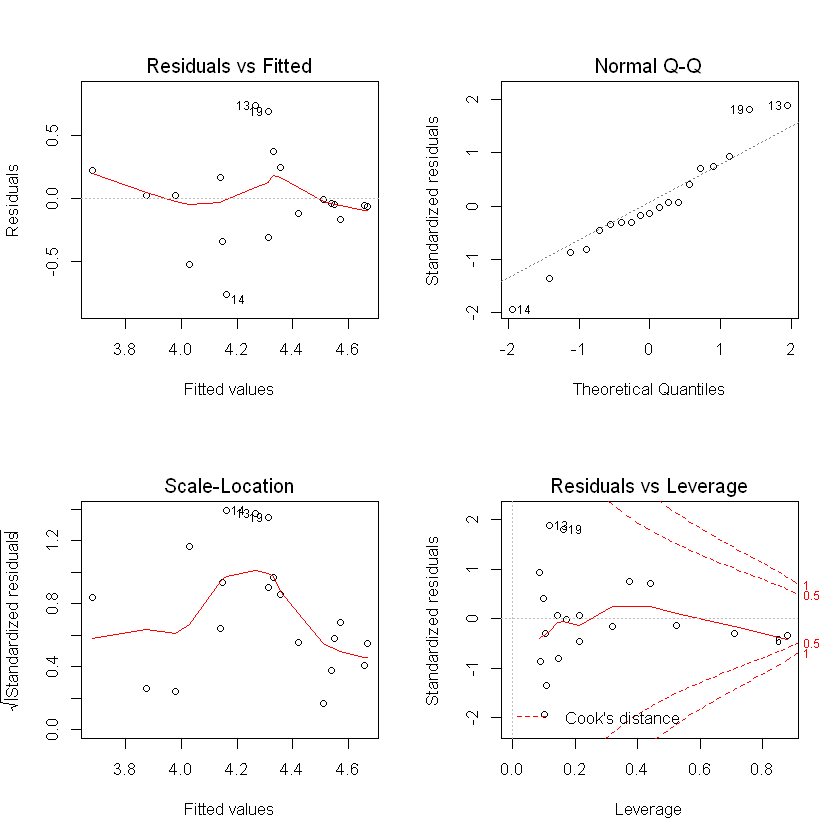

In [239]:
par(mfrow=c(2,2))
plot(gplay_reg)

In [240]:
gplay_data <- gplay_data[c(-13,-14,-19),]    # 13, 14, 19 데이터 제거

In [241]:
gplay_reg = lm(Rating ~ ., gplay_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45770 -0.09031 -0.01421  0.10011  0.48442 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.213e+00  1.934e-01  21.782 2.14e-10 ***
Reviews      6.554e-05  5.414e-05   1.211    0.251    
Size        -7.918e-03  4.424e-03  -1.790    0.101    
Installs    -8.983e-07  5.444e-06  -0.165    0.872    
Price        3.697e-02  2.162e-02   1.710    0.115    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2468 on 11 degrees of freedom
Multiple R-squared:  0.651,	Adjusted R-squared:  0.524 
F-statistic: 5.129 on 4 and 11 DF,  p-value: 0.01402


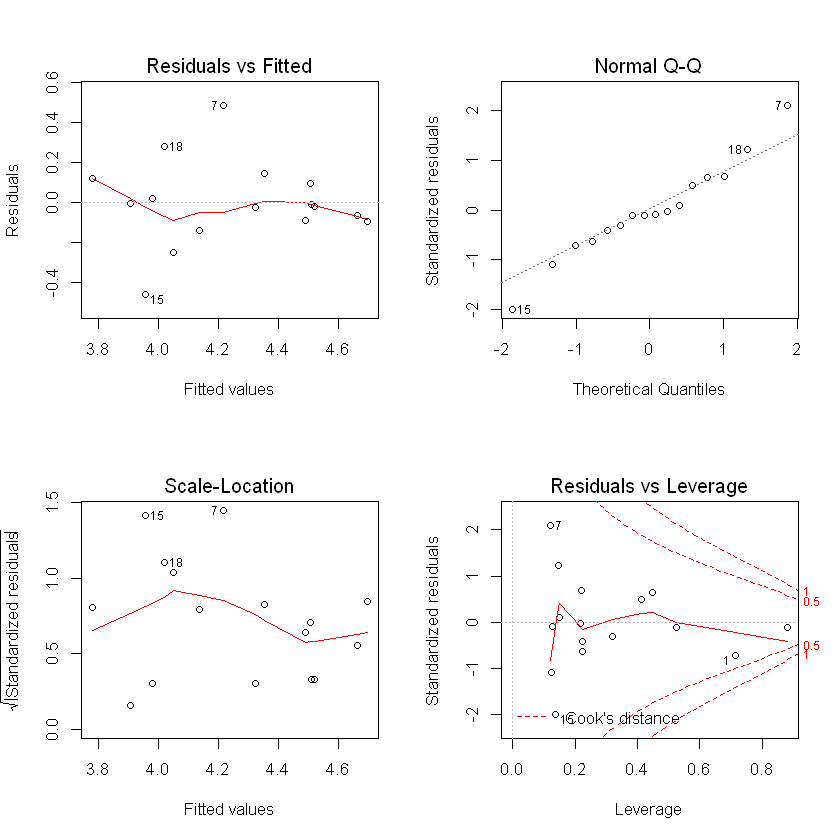

In [242]:
par(mfrow=c(2,2))
plot(gplay_reg)

In [243]:
panel.cor <- function(x,y,digits=2, prefix="", cex.cor,...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr=c(0,1,0,1))
  r <- abs(cor(x,y))
  txt <- format(c(r,0.123456789),digits=digits)[1]
  txt <- paste0(prefix,txt)
  if(missing(cex.cor))
      cex.cor <- 1.5/strwidth(txt)
  text(0.5,0.5,txt, cex=cex.cor*r)
}

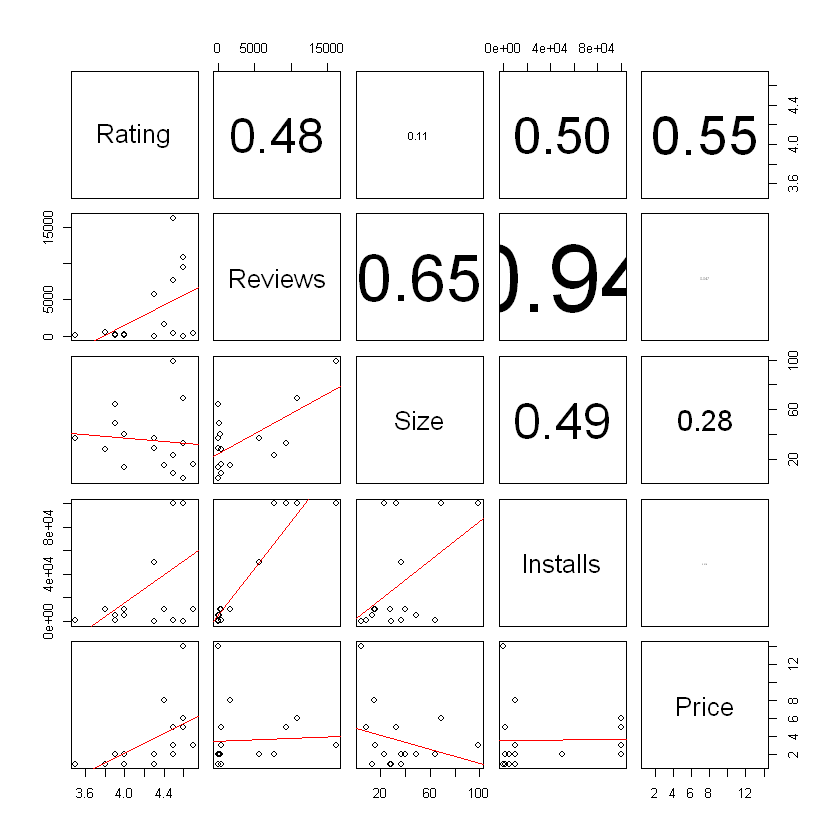

In [244]:
# panel.cor 함수는 pairs 함수 사용할때 상관계수 크기에 따라 텍스트크기가 변하도록 해주는 사용자 정의 함수 
pairs(gplay_data ,
    lower.panel=function(x,y){ 
        points(x,y);
        abline(lm(y ~ x), col='red')
    },
    upper.panel = panel.cor
)

In [245]:
library(usdm)
vif(gplay_data)

Variables,VIF
Rating,2.865064
Reviews,20.935202
Size,3.876477
Installs,13.234623
Price,1.728610


In [246]:
gplay_paid_cor <- cor(gplay_data)
gplay_eigen <- eigen(gplay_paid_cor)$val
c_index_gplay <- sqrt(gplay_eigen[1]/gplay_eigen)
c_index_gplay

[1] 1.000000 1.256981 2.317995 3.539575 9.547373

In [247]:
step(gplay_reg, direction="both")

Start:  AIC=-40.77
Rating ~ Reviews + Size + Installs + Price

           Df Sum of Sq     RSS     AIC
- Installs  1  0.001658 0.67158 -42.731
<none>                  0.66992 -40.771
- Reviews   1  0.089267 0.75919 -40.769
- Price     1  0.178061 0.84799 -39.000
- Size      1  0.195136 0.86506 -38.681

Step:  AIC=-42.73
Rating ~ Reviews + Size + Price

           Df Sum of Sq     RSS     AIC
<none>                  0.67158 -42.731
+ Installs  1   0.00166 0.66992 -40.771
- Price     1   0.21469 0.88627 -40.293
- Size      1   0.25367 0.92525 -39.604
- Reviews   1   0.65280 1.32438 -33.866



Call:
lm(formula = Rating ~ Reviews + Size + Price, data = gplay_data)

Coefficients:
(Intercept)      Reviews         Size        Price  
  4.195e+00    5.708e-05   -7.514e-03    3.818e-02  


In [248]:
gplay_data <- gplay_data %>% dplyr::select(-Installs)
vif(gplay_data)
gplay_paid_cor <- cor(gplay_data)
gplay_eigen <- eigen(gplay_paid_cor)$val
c_index_gplay <- sqrt(gplay_eigen[1]/gplay_eigen)
c_index_gplay

Variables,VIF
Rating,2.857991
Reviews,3.779100
Size,2.864745
Price,1.594298


[1] 1.000000 1.045182 2.027836 3.699179

In [249]:
gplay_reg = lm(Rating ~ ., gplay_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45572 -0.08428 -0.01447  0.08642  0.48771 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.195e+00  1.496e-01  28.035 2.63e-12 ***
Reviews      5.708e-05  1.671e-05   3.415  0.00512 ** 
Size        -7.514e-03  3.529e-03  -2.129  0.05465 .  
Price        3.818e-02  1.949e-02   1.959  0.07381 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2366 on 12 degrees of freedom
Multiple R-squared:  0.6501,	Adjusted R-squared:  0.5626 
F-statistic: 7.432 on 3 and 12 DF,  p-value: 0.004501


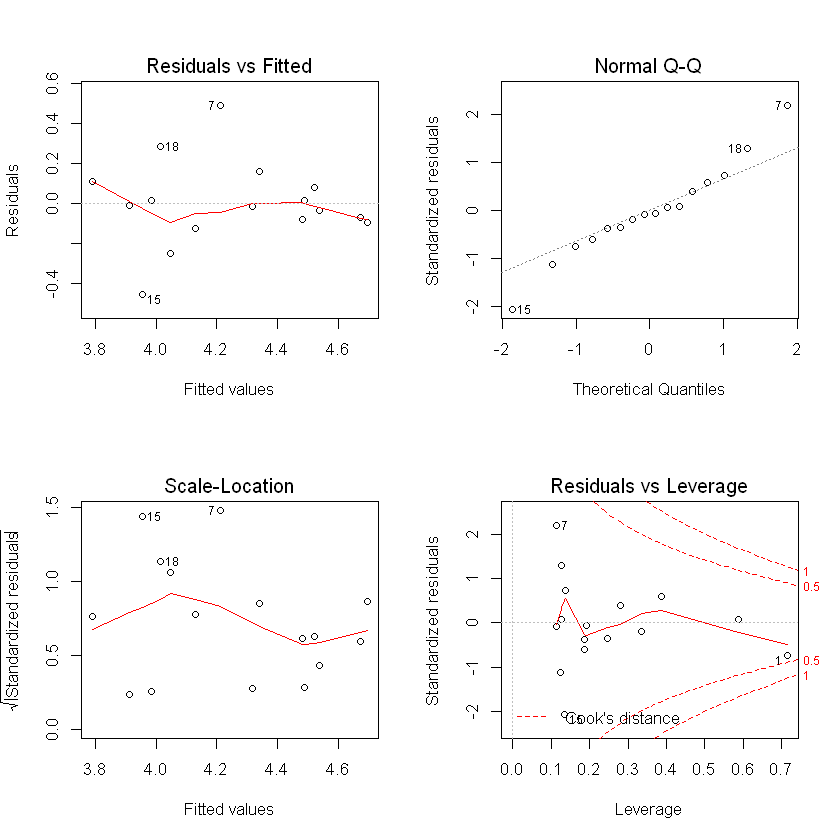

In [250]:
par(mfrow=c(2,2))
plot(gplay_reg)

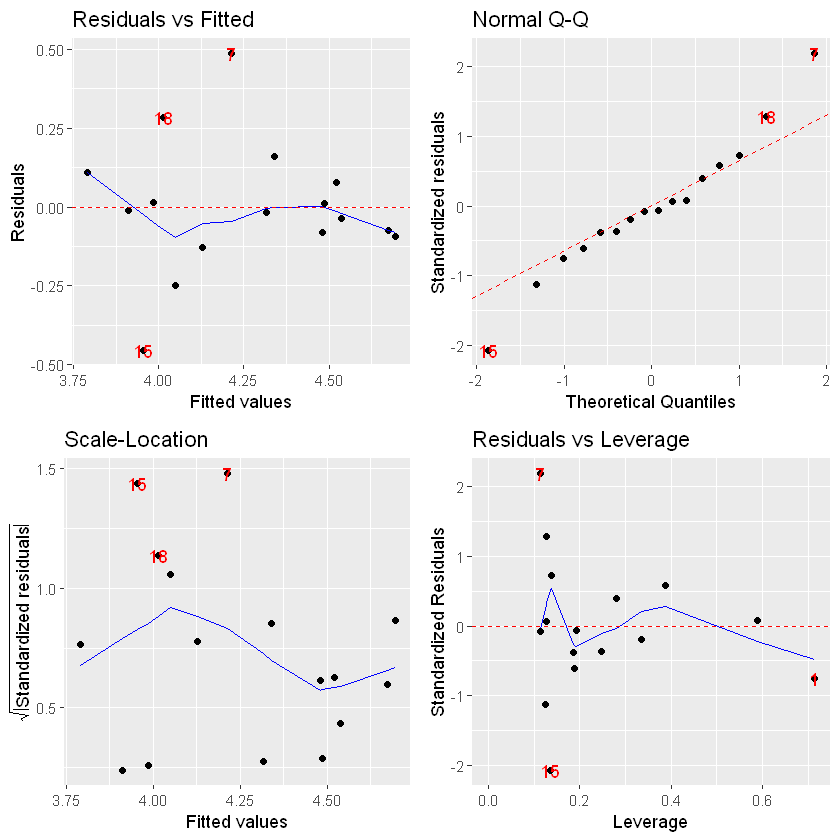

In [251]:
autoplot(gplay_reg
         , colour = "black"
         , label.colour ="red"
         , smooth.colour = "blue"
         , ad.colour = "red")